API request successful
Received boxes: []
Received embeddings shape: []


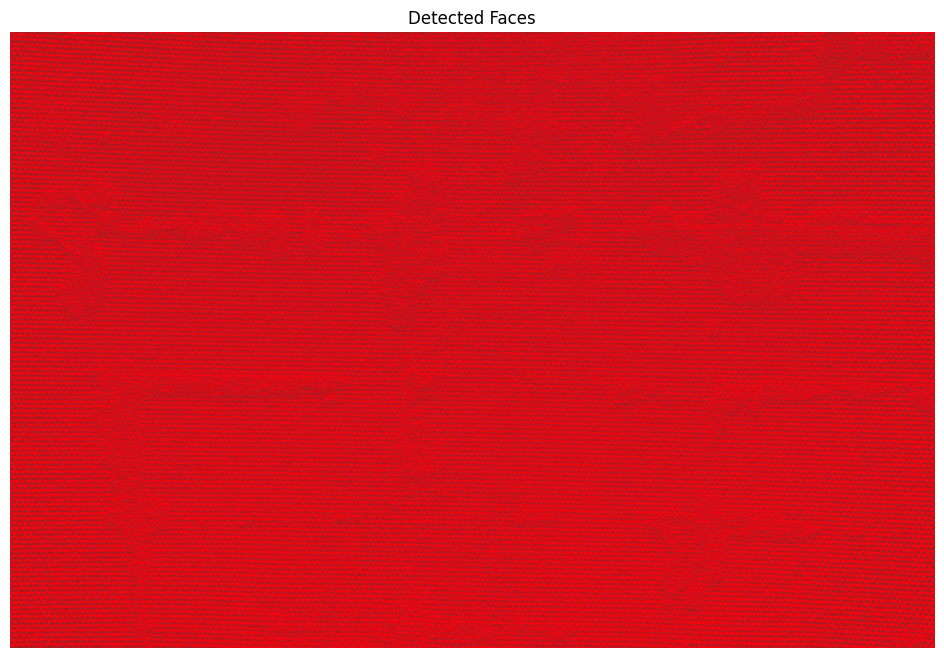

In [4]:
import requests
import numpy as np
from PIL import Image, ImageDraw
import io
import matplotlib.pyplot as plt

def test_and_draw_api():
    # API endpoint
    url = "http://127.0.0.1:5001/process_image"

    # Path to your test image
    image_path = "test1.jpg"

    # Open and prepare the image
    with open(image_path, "rb") as image_file:
        files = {"image": ("test_image.jpg", image_file, "image/jpeg")}

        # Send POST request to the API
        response = requests.post(url, files=files)

    # Check if the request was successful
    if response.status_code == 200:
        print("API request successful")
        data = response.json()
        
        # Print the received data
        print("Received boxes:", data['boxes'])
        print("Received embeddings shape:", [len(emb) for emb in data['embeddings']])

        # Open the original image for drawing
        image = Image.open(image_path)
        draw = ImageDraw.Draw(image)

        # Draw bounding boxes
        for box in data['boxes']:
            x1, x2, y1, y2 = box
            draw.rectangle([x1, y1, x2, y2], outline="red", width=2)

        # Display the image with bounding boxes
        plt.figure(figsize=(12, 8))
        plt.imshow(np.array(image))
        plt.axis('off')
        plt.title("Detected Faces")
        plt.show()

    else:
        print(f"API request failed with status code: {response.status_code}")
        print(f"Error message: {response.text}")

if __name__ == "__main__":
    test_and_draw_api()